In [54]:
import os
os.chdir("/workspaces/BAIT")

# Load results csv

In [55]:
import pandas as pd

pd.set_option("display.max.columns", None)

df = pd.read_csv("./analysis/results/results.csv")
df.columns

Index(['Unnamed: 0', 'file', 'name', 'repeat_nr', 'model', 'dataset',
       'initialization_id', 'final_sparsity', 'accuracy', 'is_baseline',
       'baseline_type', 'phase_0_strategy', 'phase_0_sparsity',
       'phase_0_prune_epochs', 'phase_0_type', 'phase_1_iterations',
       'phase_1_rewind_iteration', 'phase_1_rewind', 'phase_1_strategy',
       'phase_1_sparsity', 'phase_1_prune_epochs', 'phase_1_train_epochs',
       'phase_1_type', 'phase_1_total_iterations', 'phase_1_total_epochs',
       'phase_2_train_epochs', 'phase_2_type', 'phase_2_total_iterations',
       'phase_2_total_epochs', 'phase_0_iterations',
       'phase_0_rewind_iteration', 'phase_0_rewind', 'phase_0_train_epochs',
       'phase_0_total_iterations', 'phase_0_total_epochs'],
      dtype='object')

# Plot

In [56]:
# df_plot = df.copy()

df["phase_1_strategy"].fillna("Baseline", inplace=True)
df["is_baseline"] = df.apply(lambda x: "Baseline" + ("-iterative" if x["phase_0_type"] == "IterativePruningPhase" else "-oneshot") if x["phase_1_strategy"] == "Baseline"  else "combination", axis=1)
# prep axis
df["hue"] = df["phase_0_strategy"] + df["phase_1_strategy"]
# df_plot["hue"] = df_plot["phase_1_strategy"] + df
df["x"] = df["final_sparsity"]
df["y"] = df["accuracy"]
df["time"] = df["file"].apply(lambda x: int(x.split("_")[-1].split(".")[0][:8]))
df = df[df["time"] < 20220429]

[(80.0, 98.0)]

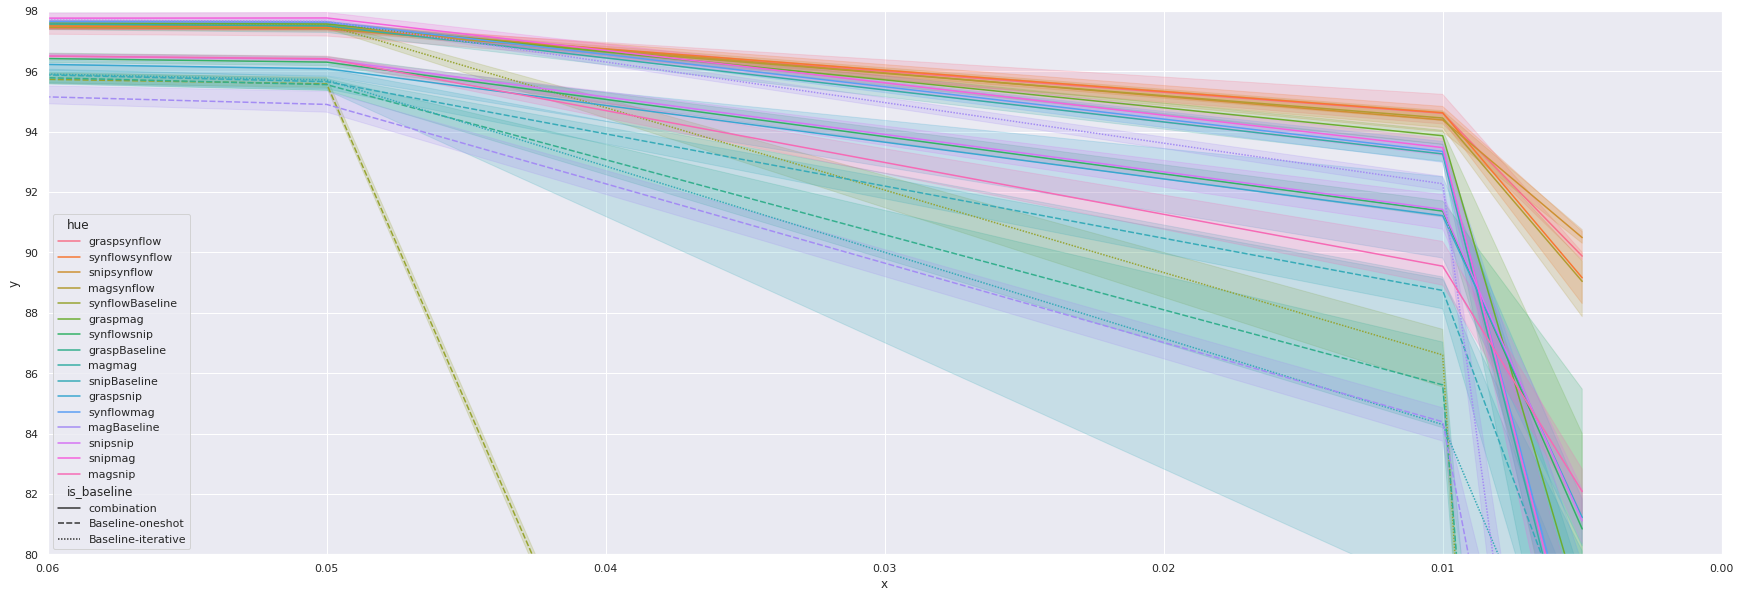

In [57]:


# df_plot = df_plot[["strategy", "accuracy", "final_sparsity"]].groupby(["strategy", "final_sparsity"]).agg(["mean", "std"]).reset_index()
# df_plot.columns  = df_plot.columns.map(' '.join).str.strip()
df_plot = df[["x", "y", "hue", "is_baseline"]]
import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
plt = sns.lineplot(data=df_plot, x="x", y="y", hue="hue", style="is_baseline")
plt.set(xlim=(0.06, 0.00))
plt.set(ylim=(80, 98))

## Sparsity Bracket Analysis

### $>$ 0.05

[(96.0, 98.0)]

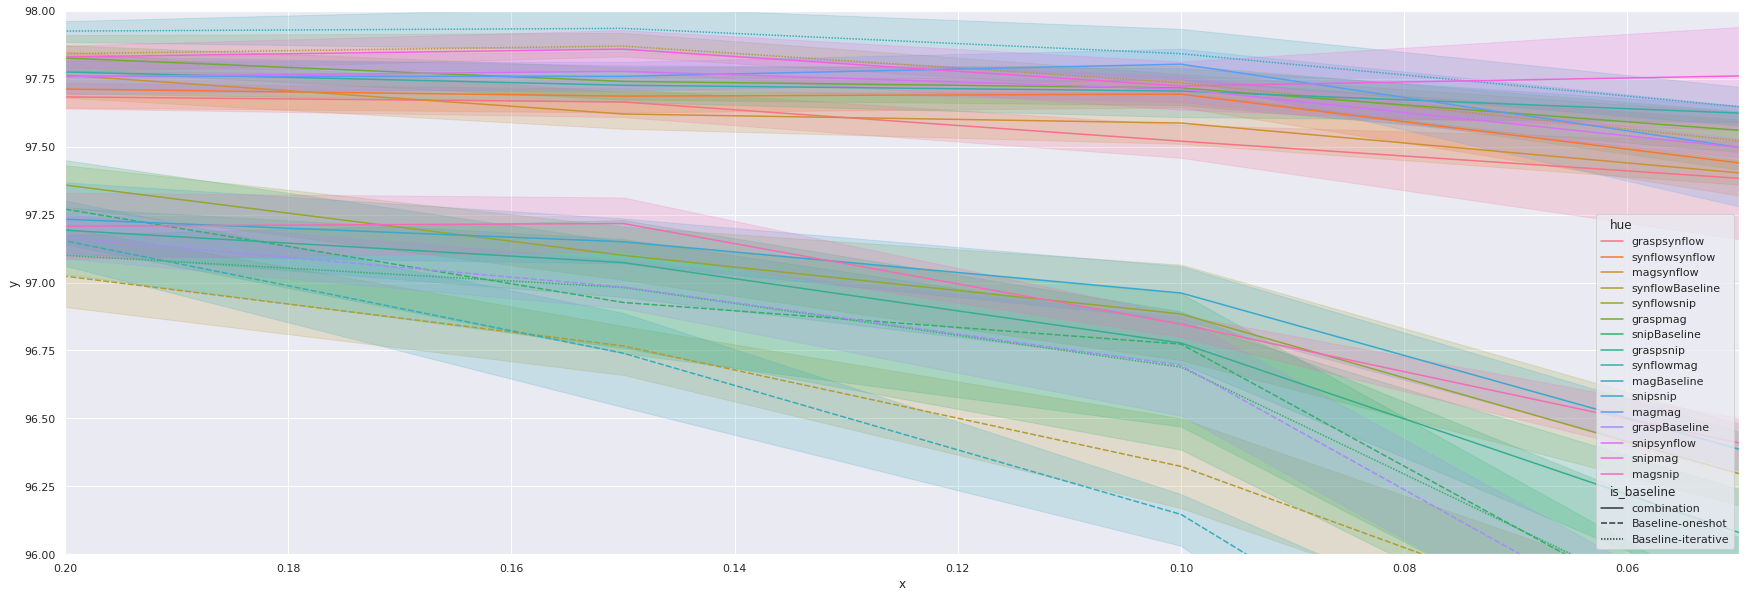

In [35]:
df_above_05 = df[df["x"] >= 0.05]
plt_above_05 = sns.lineplot(data=df_above_05, x="x", y="y", hue="hue", style="is_baseline")
plt_above_05.set(xlim=(0.2, 0.05))
plt_above_05.set(ylim=(96, 98))

[(97.3, 98.0)]

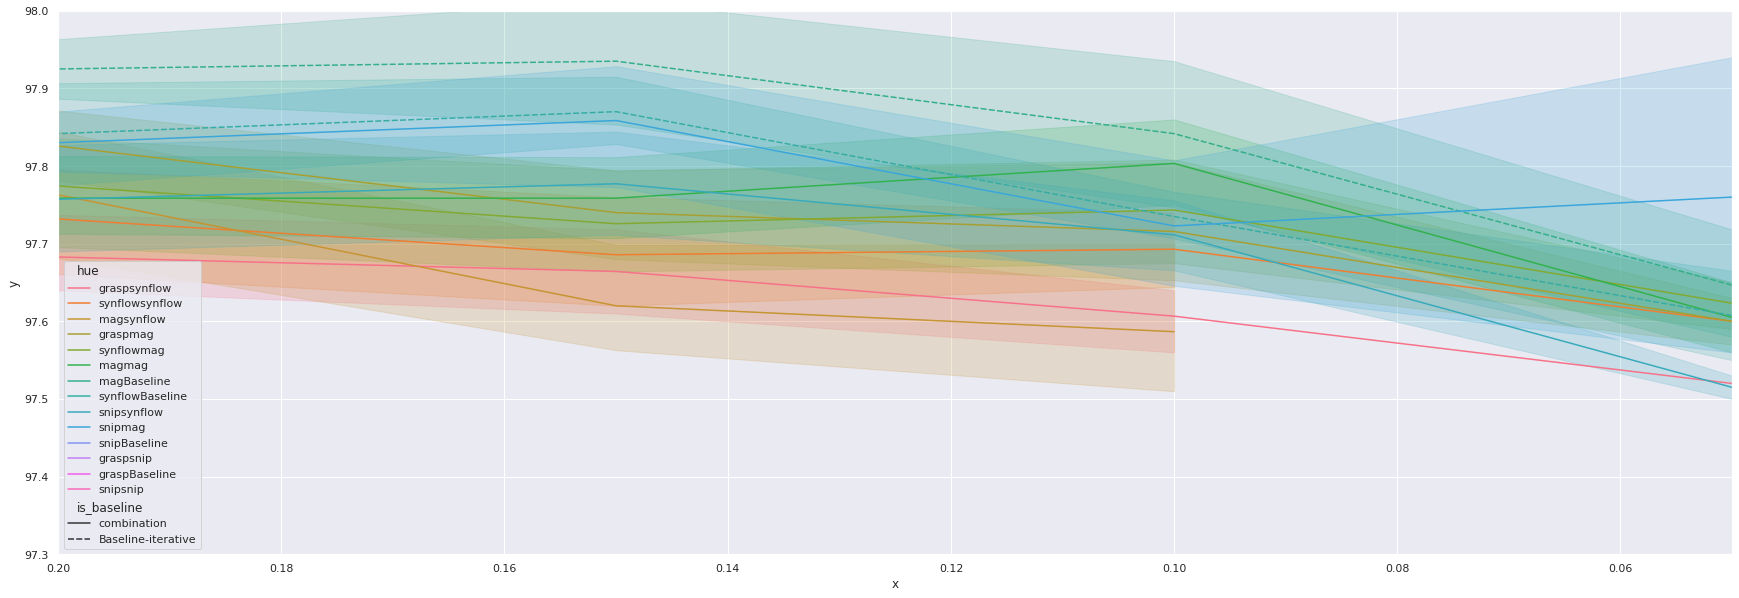

In [36]:
# Group 1
df_group1 = df_above_05[df_above_05["y"] >= 97.5]
plt_group1 = sns.lineplot(data=df_group1, x="x", y="y", hue="hue", style="is_baseline")
plt_group1.set(xlim=(0.2, 0.05))
plt_group1.set(ylim=(97.3, 98))

[(94.7, 97.5)]

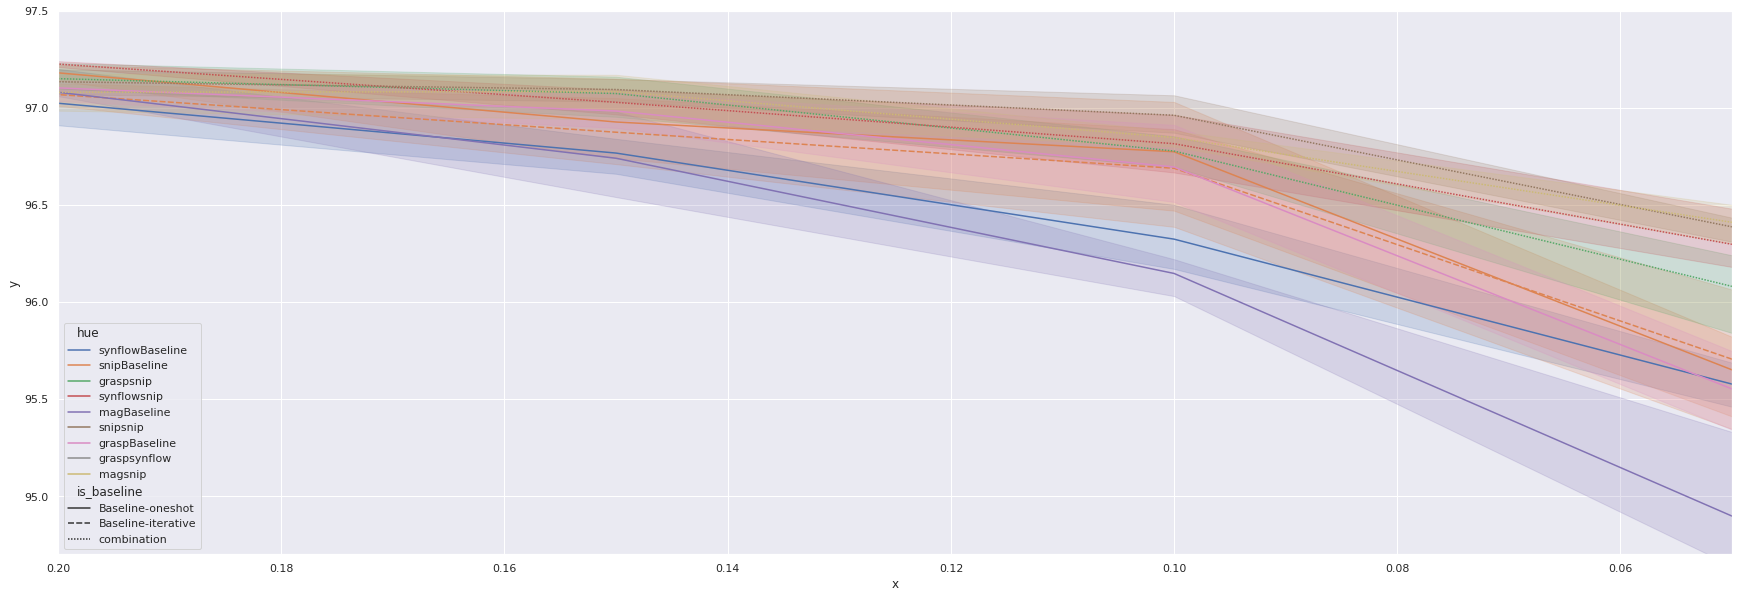

In [37]:
# Group 2
df_group2 = df_above_05[df_above_05["y"] < 97.25]
plt_group2 = sns.lineplot(data=df_group2, x="x", y="y", hue="hue", style="is_baseline")
plt_group2.set(xlim=(0.2, 0.05))
plt_group2.set(ylim=(94.7, 97.5))

In [38]:
diff = df_above_05["y"].max() - df_above_05["y"].min()
diff

3.4399999999999977

### [0.05, 0.01]

[(84.0, 98.0)]

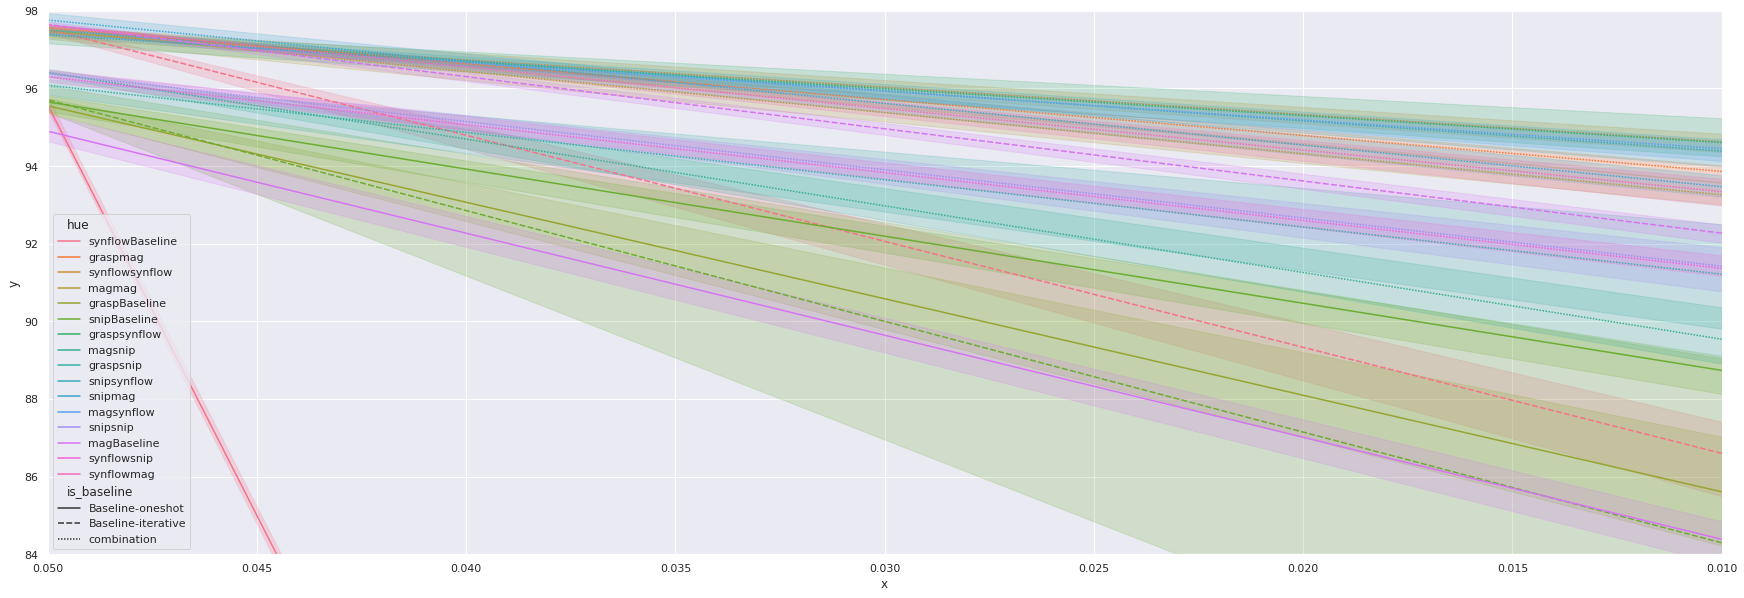

In [39]:
df_between_0501 = df[(df["x"] <= 0.05) & (df["x"] >= 0.01)]
plt_between_0501 = sns.lineplot(data=df_between_0501, x="x", y="y", hue="hue", style="is_baseline")
plt_between_0501.set(xlim=(0.05, 0.01))
plt_between_0501.set(ylim=(84, 98))

[(95.0, 98.0)]

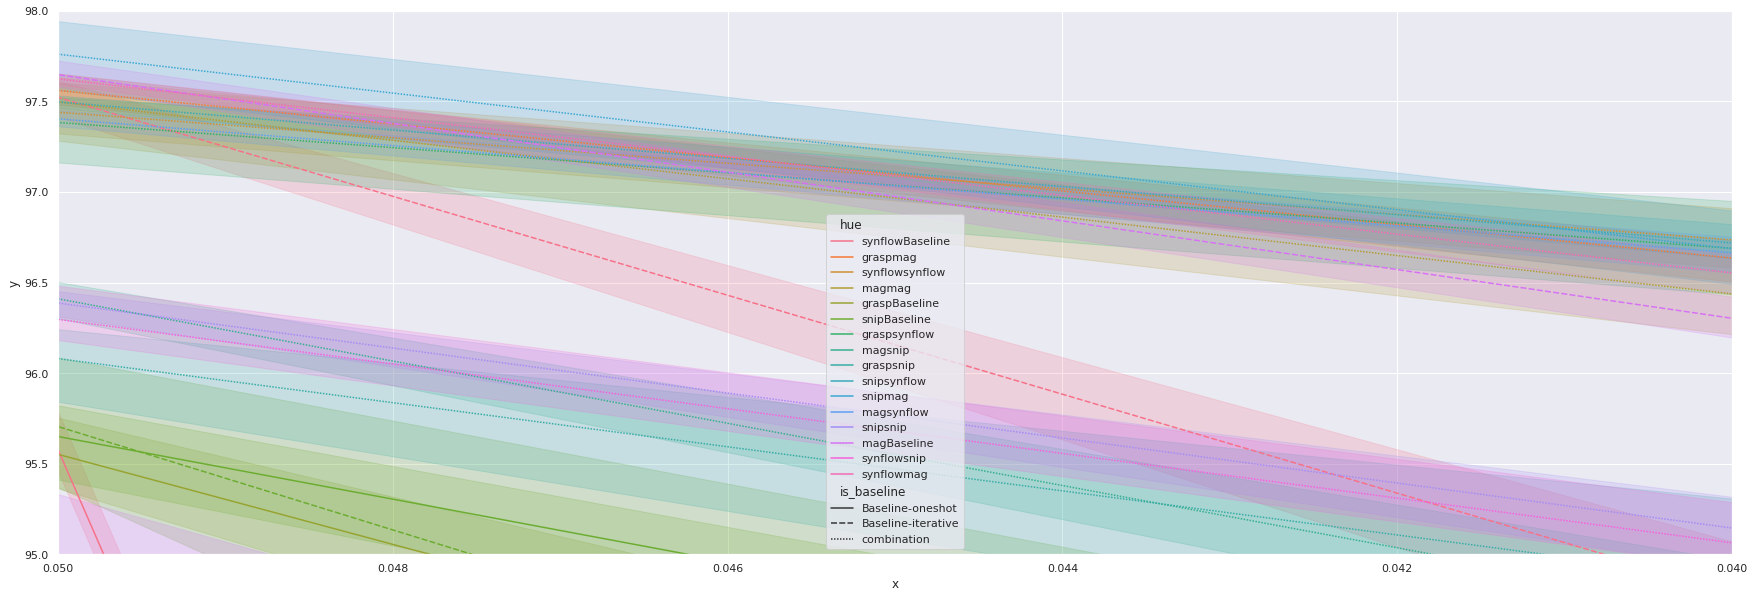

In [40]:
# Group 1 Split Start
plt_between_0501s = sns.lineplot(data=df_between_0501, x="x", y="y", hue="hue", style="is_baseline")
plt_between_0501s.set(xlim=(0.05, 0.04))
plt_between_0501s.set(ylim=(95, 98))

[(92.0, 96.0)]

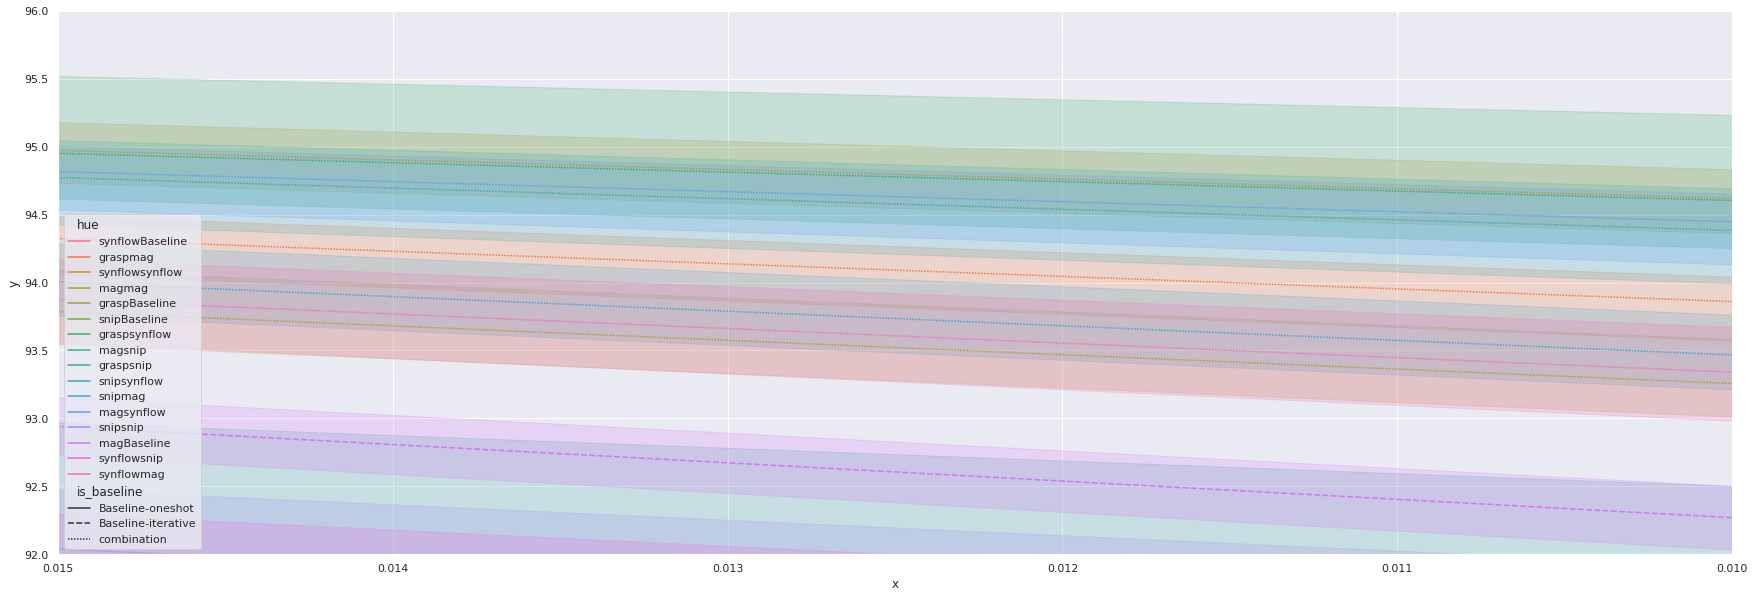

In [41]:
# Group 1 Split End
plt_between_0501e = sns.lineplot(data=df_between_0501, x="x", y="y", hue="hue", style="is_baseline")
plt_between_0501e.set(xlim=(0.015, 0.01))
plt_between_0501e.set(ylim=(92, 96))

### $<$ 0.01

[(70.0, 96.0)]

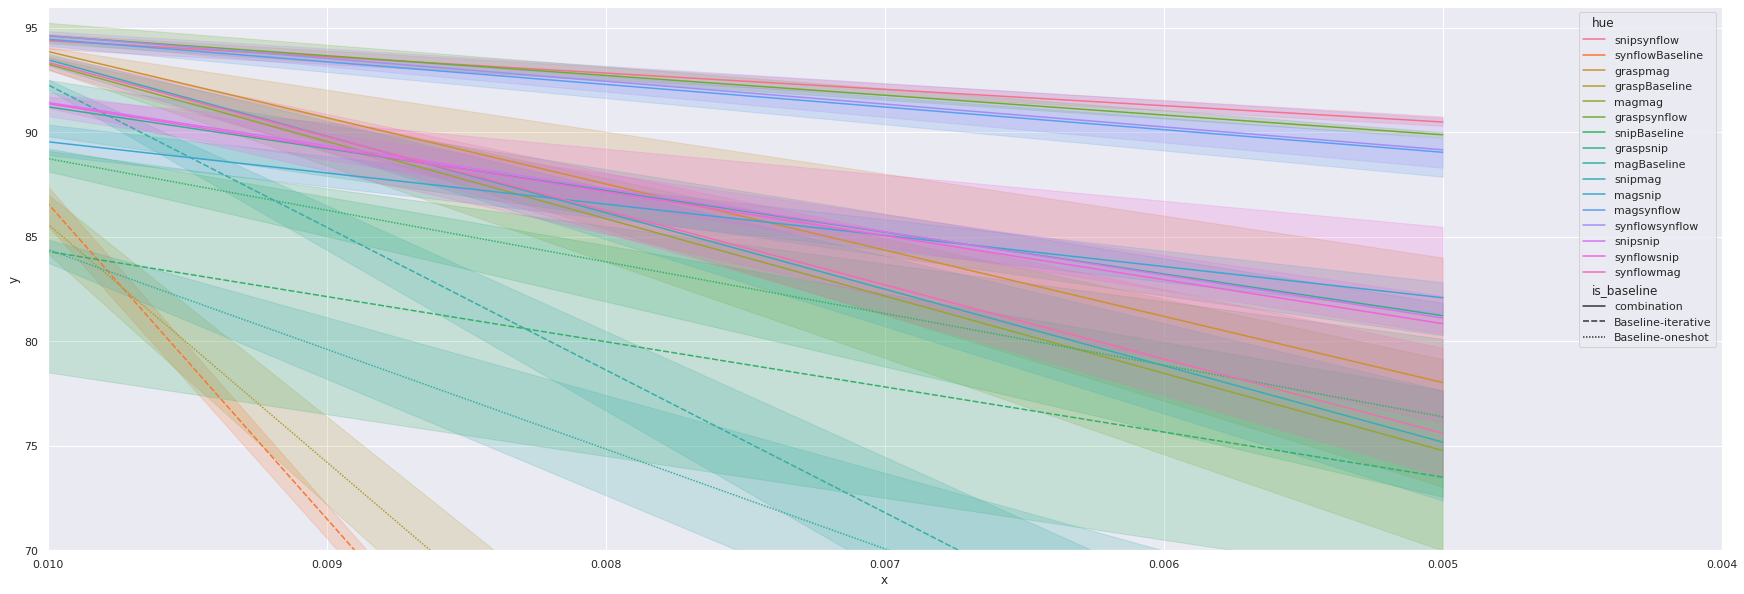

In [42]:
df_below_01 = df[df["x"] <= 0.01]
plt_below_01 = sns.lineplot(data=df_below_01, x="x", y="y", hue="hue", style="is_baseline")
plt_below_01.set(xlim=(0.01, 0.004))
plt_below_01.set(ylim=(70, 96))

# Relative to corresponding baseline

In [43]:


df_baselines = df.copy()
df_baselines["phase_1_strategy"].fillna("Baseline", inplace=True)
df_baselines = df_baselines[df_baselines["phase_1_strategy"] == "Baseline"]
df_baselines = df_baselines[["phase_0_strategy", "final_sparsity", "accuracy", "phase_0_type"]]
df_baselines = df_baselines.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean().reset_index()
df_baselines

,phase_0_strategy,phase_0_type,final_sparsity,accuracy
0,grasp,IterativePruningPhase,0.680000,97.570000
1,grasp,IterativePruningPhase,0.681612,97.500000
2,grasp,IterativePruningPhase,0.683212,97.460000
3,grasp,PruningPhase,0.005000,28.670000
4,grasp,PruningPhase,0.010000,85.610000
5,grasp,PruningPhase,0.050000,95.551667
6,grasp,PruningPhase,0.100000,96.695000
7,grasp,PruningPhase,0.150000,96.983333
8,grasp,PruningPhase,0.200000,97.165000
9,mag,IterativePruningPhase,0.005000,58.166667


In [44]:
df_r = df.copy()
df_r["phase_1_strategy"].fillna("Baseline", inplace=True)
df_r = df_r[df_r["phase_1_strategy"] != "Baseline"]
df_r = df_r[["phase_0_strategy", "phase_0_type", "phase_0_sparsity", "phase_1_strategy", "phase_1_type", "phase_1_sparsity","final_sparsity", "accuracy"]]

# improvement over one-shot pruning baseline
df_r = df_r.merge(df_baselines[df_baselines["phase_0_type"] == "PruningPhase"], how="left", on=["phase_0_strategy", "final_sparsity"], suffixes=("", "_baseline"))
# df_r = df_r.merge(df_baselines, how="left", on=["phase_0_strategy", "final_sparsity"], suffixes=("", "_baseline"))
df_r["improvement_percentage"] = ((df_r["accuracy"] - df_r["accuracy_baseline"]) / df_r["accuracy_baseline"]) * 100
df_r["improvement"] = df_r["accuracy"] - df_r["accuracy_baseline"]
df_r

,phase_0_strategy,phase_0_type,phase_0_sparsity,phase_1_strategy,phase_1_type,phase_1_sparsity,final_sparsity,accuracy,phase_0_type_baseline,accuracy_baseline,improvement_percentage,improvement
0,grasp,PruningPhase,0.5500,synflow,IterativePruningPhase,0.100,0.100,97.64,PruningPhase,96.695000,0.977300,0.945000
1,synflow,PruningPhase,0.6000,synflow,IterativePruningPhase,0.200,0.200,97.85,PruningPhase,97.023333,0.852029,0.826667
2,snip,PruningPhase,0.5025,synflow,IterativePruningPhase,0.005,0.005,90.30,PruningPhase,76.386667,18.214348,13.913333
3,mag,PruningPhase,0.5750,synflow,IterativePruningPhase,0.150,0.150,97.83,PruningPhase,96.740000,1.126731,1.090000
4,grasp,PruningPhase,0.5050,mag,IterativePruningPhase,0.010,0.010,94.04,PruningPhase,85.610000,9.846980,8.430000
...,...,...,...,...,...,...,...,...,...,...,...,...
345,synflow,PruningPhase,0.5500,snip,IterativePruningPhase,0.100,0.100,96.95,PruningPhase,96.323333,0.650587,0.626667
346,synflow,PruningPhase,0.6000,mag,IterativePruningPhase,0.200,0.200,97.78,PruningPhase,97.023333,0.779881,0.756667
347,snip,PruningPhase,0.5500,mag,IterativePruningPhase,0.100,0.100,97.70,PruningPhase,96.773333,0.957564,0.926667
348,snip,PruningPhase,0.5250,snip,IterativePruningPhase,0.050,0.050,96.31,PruningPhase,95.650000,0.690016,0.660000


[(0.0, 100.0)]

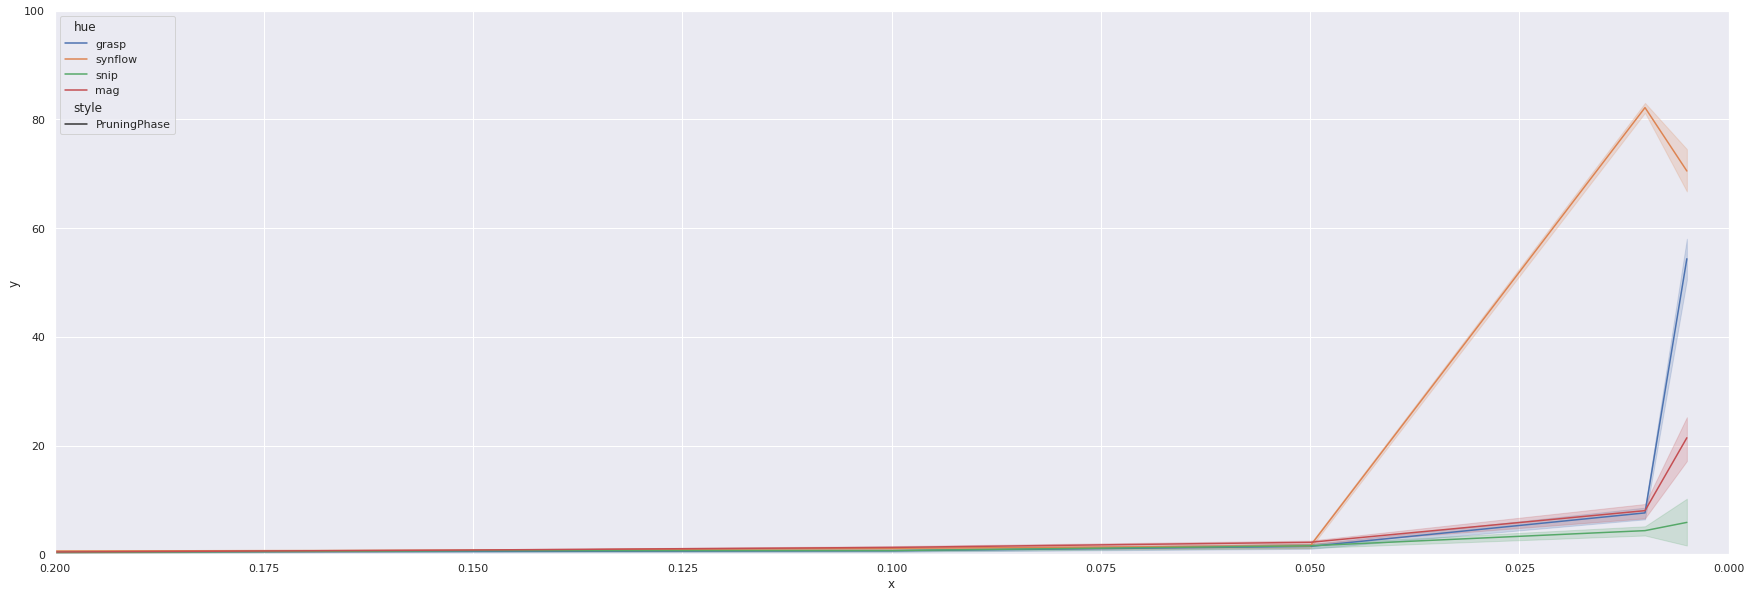

In [45]:
df_r["x"] = df_r["final_sparsity"]
df_r["y"] = df_r["improvement"]
# df_r["hue"] = df_r["phase_0_strategy"] + df_r["phase_1_strategy"]
df_r["hue"] = df_r["phase_0_strategy"]
df_r["style"] = df_r["phase_0_type_baseline"]

import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
plt = sns.lineplot(data=df_r, x="x", y="y", hue="hue", style="style")
plt.set(xlim=(0.2, 0.0))
plt.set(ylim=(0, 100))

In [46]:
df_r2 = df.copy()
df_r2["phase_1_strategy"].fillna("Baseline", inplace=True)
df_r2 = df_r2[df_r2["phase_1_strategy"] != "Baseline"]
df_r2 = df_r2[["phase_0_strategy", "phase_0_type", "phase_0_sparsity", "phase_1_strategy", "phase_1_type", "phase_1_sparsity","final_sparsity", "accuracy"]]

# improvement over iterative pruning baseline
df_r2 = df_r2.merge(df_baselines[df_baselines["phase_0_type"] == "IterativePruningPhase"], how="left", on=["phase_0_strategy", "final_sparsity"], suffixes=("", "_baseline"))
# df_r = df_r.merge(df_baselines, how="left", on=["phase_0_strategy", "final_sparsity"], suffixes=("", "_baseline"))
df_r2["improvement"] = df_r2["accuracy"] - df_r2["accuracy_baseline"]
df_r2

,phase_0_strategy,phase_0_type,phase_0_sparsity,phase_1_strategy,phase_1_type,phase_1_sparsity,final_sparsity,accuracy,phase_0_type_baseline,accuracy_baseline,improvement
0,grasp,PruningPhase,0.5500,synflow,IterativePruningPhase,0.100,0.100,97.64,NaN,NaN,NaN
1,synflow,PruningPhase,0.6000,synflow,IterativePruningPhase,0.200,0.200,97.85,IterativePruningPhase,97.841667,0.008333
2,snip,PruningPhase,0.5025,synflow,IterativePruningPhase,0.005,0.005,90.30,IterativePruningPhase,73.496667,16.803333
3,mag,PruningPhase,0.5750,synflow,IterativePruningPhase,0.150,0.150,97.83,IterativePruningPhase,97.935000,-0.105000
4,grasp,PruningPhase,0.5050,mag,IterativePruningPhase,0.010,0.010,94.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
345,synflow,PruningPhase,0.5500,snip,IterativePruningPhase,0.100,0.100,96.95,IterativePruningPhase,97.735000,-0.785000
346,synflow,PruningPhase,0.6000,mag,IterativePruningPhase,0.200,0.200,97.78,IterativePruningPhase,97.841667,-0.061667
347,snip,PruningPhase,0.5500,mag,IterativePruningPhase,0.100,0.100,97.70,IterativePruningPhase,96.688333,1.011667
348,snip,PruningPhase,0.5250,snip,IterativePruningPhase,0.050,0.050,96.31,IterativePruningPhase,95.705000,0.605000


[(0.0, 100.0)]

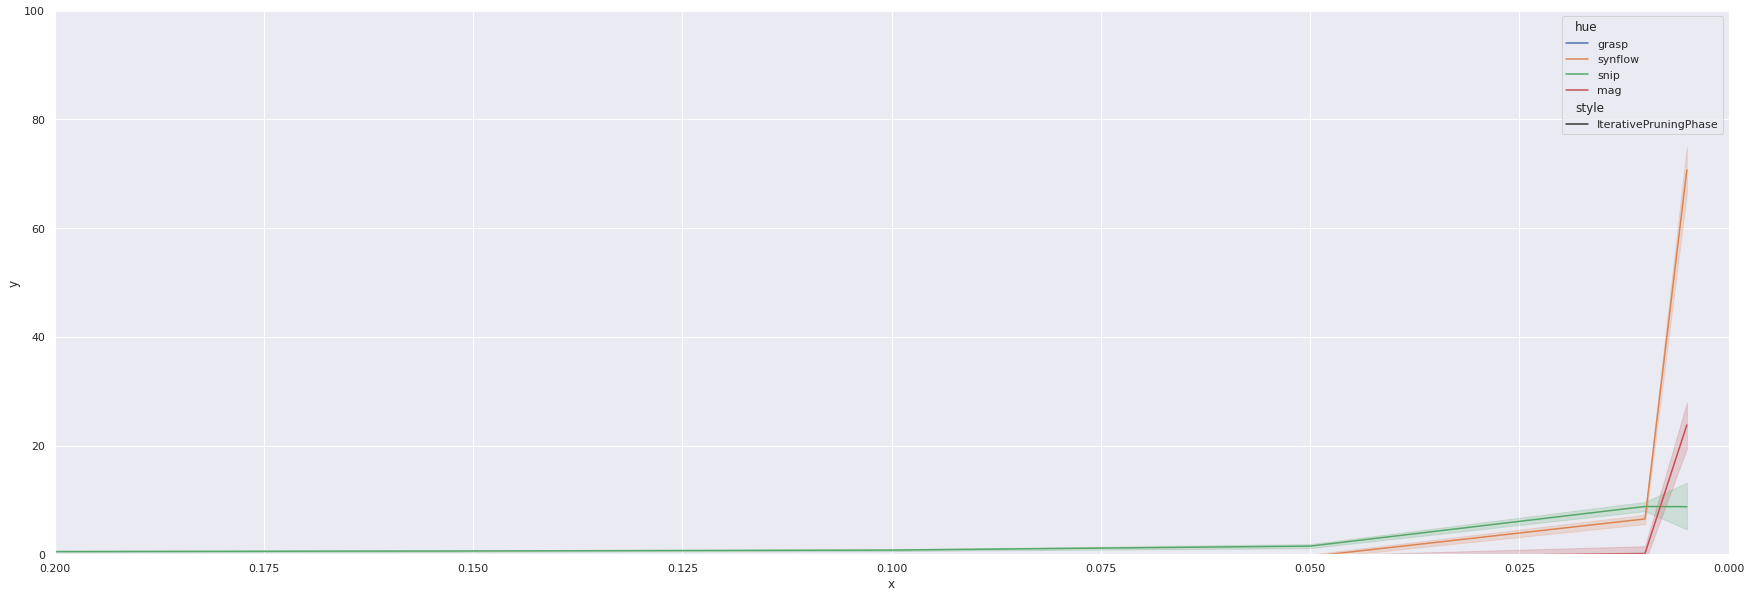

In [47]:
df_r2["x"] = df_r2["final_sparsity"]
df_r2["y"] = df_r2["improvement"]
# df_r["hue"] = df_r["phase_0_strategy"] + df_r["phase_1_strategy"]
df_r2["hue"] = df_r2["phase_0_strategy"]
df_r2["style"] = df_r2["phase_0_type_baseline"]

import seaborn as sns
sns.set(rc={'figure.figsize':(30, 10)})
plt = sns.lineplot(data=df_r2, x="x", y="y", hue="hue", style="style")
plt.set(xlim=(0.2, 0.0))
plt.set(ylim=(0, 100))

In [48]:
sparsities = [0.2, 0.15, 0.1, 0.05, 0.01, 0.005]
spar0 = df[df["final_sparsity"] == sparsities[0]]
# spar0_gb = spar0.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean()
#spar0_gb = spar0[["x", "y"]]
spar0.sort_values(by=["y"], ascending=False)

,Unnamed: 0,file,name,repeat_nr,model,dataset,initialization_id,final_sparsity,accuracy,is_baseline,baseline_type,phase_0_strategy,phase_0_sparsity,phase_0_prune_epochs,phase_0_type,phase_1_iterations,phase_1_rewind_iteration,phase_1_rewind,phase_1_strategy,phase_1_sparsity,phase_1_prune_epochs,phase_1_train_epochs,phase_1_type,phase_1_total_iterations,phase_1_total_epochs,phase_2_train_epochs,phase_2_type,phase_2_total_iterations,phase_2_total_epochs,phase_0_iterations,phase_0_rewind_iteration,phase_0_rewind,phase_0_train_epochs,phase_0_total_iterations,phase_0_total_epochs,hue,x,y,time
654,654,baseline_iterative_mag_0.2_2_20220426082620727...,baseline_iterative_mag_0.2,2,lenet_300_100,mnist,ebf526e076db825058cb548feac8429f,0.2,97.98,Baseline-iterative,IterativePruningPhase,mag,0.2,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,133196.0,131.0,magBaseline,0.2,97.98,20220426
78,78,baseline_mag_0.2_2_20220424161738749464.pt,baseline_mag_0.2,2,lenet_300_100,mnist,8fc000d056967a765c103955c1349d9b,0.2,97.97,Baseline-iterative,IterativePruningPhase,mag,0.2,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,126630.0,124.0,magBaseline,0.2,97.97,20220424
272,272,baseline_iterative_synflow_0.2_0_2022042607453...,baseline_iterative_synflow_0.2,0,lenet_300_100,mnist,6736aa6d0ca0ff3bb56805b4475bf333,0.2,97.95,Baseline-iterative,IterativePruningPhase,synflow,0.2,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,131320.0,129.0,synflowBaseline,0.2,97.95,20220426
1059,1059,baseline_mag_0.2_1_20220424161738749464.pt,baseline_mag_0.2,1,lenet_300_100,mnist,6c6f9afcf2361df81c8a0d9be3546ade,0.2,97.95,Baseline-iterative,IterativePruningPhase,mag,0.2,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,136010.0,134.0,magBaseline,0.2,97.95,20220424
860,860,0.6000000000000001-mag_0.2-synflow_1_202204241...,0.6000000000000001-mag_0.2-synflow,1,lenet_300_100,mnist,143d49263e2d45b967c042031d7e559a,0.2,97.95,combination,NaN,mag,0.6,10,PruningPhase,10.0,0.0,True,synflow,0.2,10.0,100.0,IterativePruningPhase,133196.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magsynflow,0.2,97.95,20220424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,517,0.6000000000000001-mag_0.2-snip_2_202204222048...,0.6000000000000001-mag_0.2-snip,2,lenet_300_100,mnist,c1633dccd34762c9b3f7ae40e774570a,0.2,96.99,combination,NaN,mag,0.6,10,PruningPhase,10.0,0.0,True,snip,0.2,10.0,100.0,IterativePruningPhase,139762.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magsnip,0.2,96.99,20220422
1035,1035,baseline_iterative_snip_0.2_1_2022042608262066...,baseline_iterative_snip_0.2,1,lenet_300_100,mnist,a4f7c11797b2693cfd3ea581b5ef0627,0.2,96.98,Baseline-iterative,IterativePruningPhase,snip,0.2,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,136010.0,134.0,snipBaseline,0.2,96.98,20220426
192,192,0.6000000000000001-mag_0.2-snip_5_202204222048...,0.6000000000000001-mag_0.2-snip,5,lenet_300_100,mnist,e7af8799291c23e18332f82d4486b8e5,0.2,96.98,combination,NaN,mag,0.6,10,PruningPhase,10.0,0.0,True,snip,0.2,10.0,100.0,IterativePruningPhase,144452.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magsnip,0.2,96.98,20220422
365,365,baseline_oneshot_synflow_0.2_2_202204260745322...,baseline_oneshot_synflow_0.2,2,lenet_300_100,mnist,06d37e087c38ba048d60500b2bdd6aa1,0.2,96.96,Baseline-oneshot,PruningPhase,synflow,0.2,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,20636.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowBaseline,0.2,96.96,20220426


In [49]:
spar1 = df[df["final_sparsity"] == sparsities[1]]
# spar0_gb = spar0.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean()
#spar0_gb = spar0[["x", "y"]]
spar1.sort_values(by=["y"], ascending=False)

,Unnamed: 0,file,name,repeat_nr,model,dataset,initialization_id,final_sparsity,accuracy,is_baseline,baseline_type,phase_0_strategy,phase_0_sparsity,phase_0_prune_epochs,phase_0_type,phase_1_iterations,phase_1_rewind_iteration,phase_1_rewind,phase_1_strategy,phase_1_sparsity,phase_1_prune_epochs,phase_1_train_epochs,phase_1_type,phase_1_total_iterations,phase_1_total_epochs,phase_2_train_epochs,phase_2_type,phase_2_total_iterations,phase_2_total_epochs,phase_0_iterations,phase_0_rewind_iteration,phase_0_rewind,phase_0_train_epochs,phase_0_total_iterations,phase_0_total_epochs,hue,x,y,time
775,775,baseline_mag_0.15_0_20220424161738749464.pt,baseline_mag_0.15,0,lenet_300_100,mnist,6fd089502ad3d9b2130d27cfad368846,0.15,98.08,Baseline-iterative,IterativePruningPhase,mag,0.150,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,123816.0,121.0,magBaseline,0.15,98.08,20220424
828,828,baseline_iterative_mag_0.15_0_2022042608262072...,baseline_iterative_mag_0.15,0,lenet_300_100,mnist,d32454bc253fb92318c7e80701ecf914,0.15,98.01,Baseline-iterative,IterativePruningPhase,mag,0.150,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,145390.0,144.0,magBaseline,0.15,98.01,20220426
823,823,baseline_iterative_mag_0.15_1_2022042608262072...,baseline_iterative_mag_0.15,1,lenet_300_100,mnist,2b0c058f91258e7ce67df50eba5fe132,0.15,98.01,Baseline-iterative,IterativePruningPhase,mag,0.150,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,133196.0,131.0,magBaseline,0.15,98.01,20220426
388,388,baseline_synflow_0.15_2_20220424161738749464.pt,baseline_synflow_0.15,2,lenet_300_100,mnist,cebe9785f2e6a8eb0a7585710e65d100,0.15,97.96,Baseline-iterative,IterativePruningPhase,synflow,0.150,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,113498.0,110.0,synflowBaseline,0.15,97.96,20220424
758,758,0.575-snip_0.15-mag_0_20220422204832792699.pt,0.575-snip_0.15-mag,0,lenet_300_100,mnist,bffe058b959f974b1efbbf88d72aa46e,0.15,97.95,combination,NaN,snip,0.575,10,PruningPhase,10.0,0.0,True,mag,0.15,10.0,100.0,IterativePruningPhase,125692.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipmag,0.15,97.95,20220422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,baseline_oneshot_mag_0.15_1_202204260826207273...,baseline_oneshot_mag_0.15,1,lenet_300_100,mnist,98ae73f765ab4622fc65db5acd49d187,0.15,96.70,Baseline-oneshot,PruningPhase,mag,0.150,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,18760.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magBaseline,0.15,96.70,20220426
630,630,baseline_iterative_snip_0.15_2_202204260826206...,baseline_iterative_snip_0.15,2,lenet_300_100,mnist,ae8986e0a3bbf5684884518318b0da8d,0.15,96.69,Baseline-iterative,IterativePruningPhase,snip,0.150,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,135072.0,133.0,snipBaseline,0.15,96.69,20220426
1130,1130,baseline_oneshot_synflow_0.15_0_20220426082616...,baseline_oneshot_synflow_0.15,0,lenet_300_100,mnist,de02489e30f84f7951280f46c7a5ed7b,0.15,96.66,Baseline-oneshot,PruningPhase,synflow,0.150,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,24388.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowBaseline,0.15,96.66,20220426
268,268,baseline_snip_0.15_1_20220424161738749464.pt,baseline_snip_0.15,1,lenet_300_100,mnist,11a57705bf8a8283faca86e0db3616b5,0.15,96.61,Baseline-iterative,IterativePruningPhase,snip,0.150,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,138824.0,137.0,snipBaseline,0.15,96.61,20220424


In [50]:
spar2 = df[df["final_sparsity"] == sparsities[2]]
# spar0_gb = spar0.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean()
#spar0_gb = spar0[["x", "y"]]
spar2.sort_values(by=["y"], ascending=False)

,Unnamed: 0,file,name,repeat_nr,model,dataset,initialization_id,final_sparsity,accuracy,is_baseline,baseline_type,phase_0_strategy,phase_0_sparsity,phase_0_prune_epochs,phase_0_type,phase_1_iterations,phase_1_rewind_iteration,phase_1_rewind,phase_1_strategy,phase_1_sparsity,phase_1_prune_epochs,phase_1_train_epochs,phase_1_type,phase_1_total_iterations,phase_1_total_epochs,phase_2_train_epochs,phase_2_type,phase_2_total_iterations,phase_2_total_epochs,phase_0_iterations,phase_0_rewind_iteration,phase_0_rewind,phase_0_train_epochs,phase_0_total_iterations,phase_0_total_epochs,hue,x,y,time
339,339,baseline_mag_0.1_0_20220424161738749464.pt,baseline_mag_0.1,0,lenet_300_100,mnist,1fc69fe8e6cbc875551b84cefd4e6d93,0.1,98.03,Baseline-iterative,IterativePruningPhase,mag,0.10,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,136010.0,134.0,magBaseline,0.1,98.03,20220424
390,390,0.55-grasp_0.1-mag_3_20220422204832792699.pt,0.55-grasp_0.1-mag,3,lenet_300_100,mnist,442abdc31226d5565b2d7d3480b155c6,0.1,97.95,combination,NaN,grasp,0.55,10,PruningPhase,10.0,0.0,True,mag,0.1,10.0,100.0,IterativePruningPhase,136948.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,graspmag,0.1,97.95,20220422
833,833,0.55-snip_0.1-mag_2_20220422204832792699.pt,0.55-snip_0.1-mag,2,lenet_300_100,mnist,00a8aafe314a2e2358060b71e7699962,0.1,97.92,combination,NaN,snip,0.55,10,PruningPhase,10.0,0.0,True,mag,0.1,10.0,100.0,IterativePruningPhase,135072.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipmag,0.1,97.92,20220422
977,977,0.55-snip_0.1-mag_6_20220422204832792699.pt,0.55-snip_0.1-mag,6,lenet_300_100,mnist,3508cbc905d65827e193ae38713780ce,0.1,97.87,combination,NaN,snip,0.55,10,PruningPhase,10.0,0.0,True,mag,0.1,10.0,100.0,IterativePruningPhase,132258.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipmag,0.1,97.87,20220422
894,894,0.55-synflow_0.1-mag_4_20220422204832792699.pt,0.55-synflow_0.1-mag,4,lenet_300_100,mnist,69337f47d3326976353729d5c06f20fb,0.1,97.86,combination,NaN,synflow,0.55,10,PruningPhase,10.0,0.0,True,mag,0.1,10.0,100.0,IterativePruningPhase,148204.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowmag,0.1,97.86,20220422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,562,baseline_oneshot_mag_0.1_1_2022042608262072739...,baseline_oneshot_mag_0.1,1,lenet_300_100,mnist,9a9f2b88ecc3b95b2aebb39e979f75ee,0.1,96.22,Baseline-oneshot,PruningPhase,mag,0.10,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,23450.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magBaseline,0.1,96.22,20220426
912,912,baseline_oneshot_mag_0.1_2_2022042608262072739...,baseline_oneshot_mag_0.1,2,lenet_300_100,mnist,15208dacb400fbdb4823cab38fdcf960,0.1,96.19,Baseline-oneshot,PruningPhase,mag,0.10,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,20636.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magBaseline,0.1,96.19,20220426
616,616,baseline_oneshot_synflow_0.1_0_202204260826167...,baseline_oneshot_synflow_0.1,0,lenet_300_100,mnist,9ba734f5fbad5024a5d59970a8be5a98,0.1,96.17,Baseline-oneshot,PruningPhase,synflow,0.10,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,30016.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowBaseline,0.1,96.17,20220426
916,916,baseline_oneshot_mag_0.1_0_2022042608262072739...,baseline_oneshot_mag_0.1,0,lenet_300_100,mnist,7992d77728b90ba6820698c0ff50e93a,0.1,96.03,Baseline-oneshot,PruningPhase,mag,0.10,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,27202.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magBaseline,0.1,96.03,20220426


In [51]:
spar3 = df[df["final_sparsity"] == sparsities[3]]
# spar0_gb = spar0.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean()
#spar0_gb = spar0[["x", "y"]]
spar3.sort_values(by=["y"], ascending=False)

,Unnamed: 0,file,name,repeat_nr,model,dataset,initialization_id,final_sparsity,accuracy,is_baseline,baseline_type,phase_0_strategy,phase_0_sparsity,phase_0_prune_epochs,phase_0_type,phase_1_iterations,phase_1_rewind_iteration,phase_1_rewind,phase_1_strategy,phase_1_sparsity,phase_1_prune_epochs,phase_1_train_epochs,phase_1_type,phase_1_total_iterations,phase_1_total_epochs,phase_2_train_epochs,phase_2_type,phase_2_total_iterations,phase_2_total_epochs,phase_0_iterations,phase_0_rewind_iteration,phase_0_rewind,phase_0_train_epochs,phase_0_total_iterations,phase_0_total_epochs,hue,x,y,time
206,206,0.525-snip_0.05-mag_1_20220424161738749464.pt,0.525-snip_0.05-mag,1,lenet_300_100,mnist,5eea258610f3357778ba752a6dbb6a70,0.05,97.94,combination,NaN,snip,0.525,10,PruningPhase,10.0,0.0,True,mag,0.05,10.0,100.0,IterativePruningPhase,140700.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipmag,0.05,97.94,20220424
1018,1018,0.525-snip_0.05-mag_0_20220424161738749464.pt,0.525-snip_0.05-mag,0,lenet_300_100,mnist,eeaef2ad4aca6bd813668760cf42d475,0.05,97.78,combination,NaN,snip,0.525,10,PruningPhase,10.0,0.0,True,mag,0.05,10.0,100.0,IterativePruningPhase,135072.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipmag,0.05,97.78,20220424
800,800,baseline_iterative_mag_0.05_2_2022042608262072...,baseline_iterative_mag_0.05,2,lenet_300_100,mnist,16d03cd584a6224d0e8dfaa3d2538177,0.05,97.77,Baseline-iterative,IterativePruningPhase,mag,0.050,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,135072.0,133.0,magBaseline,0.05,97.77,20220426
421,421,baseline_mag_0.05_2_20220424161738749464.pt,baseline_mag_0.05,2,lenet_300_100,mnist,723dbe25689f7359b781c8f7d6dd5d42,0.05,97.75,Baseline-iterative,IterativePruningPhase,mag,0.050,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,128506.0,126.0,magBaseline,0.05,97.75,20220424
489,489,baseline_mag_0.05_0_20220424161738749464.pt,baseline_mag_0.05,0,lenet_300_100,mnist,1fc5d8c917d1441c8936dac9fe520e0f,0.05,97.68,Baseline-iterative,IterativePruningPhase,mag,0.050,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,135072.0,133.0,magBaseline,0.05,97.68,20220424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,842,baseline_oneshot_mag_0.05_2_202204260826207273...,baseline_oneshot_mag_0.05,2,lenet_300_100,mnist,86e5bd36d4494a66c94554525b79259c,0.05,95.33,Baseline-oneshot,PruningPhase,mag,0.050,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,30954.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magBaseline,0.05,95.33,20220426
143,143,baseline_grasp_0.05_2_20220424161738749464.pt,baseline_grasp_0.05,2,lenet_300_100,mnist,2e50ca0d03727f084ba8ce928ab2341d,0.05,95.18,Baseline-oneshot,PruningPhase,grasp,0.050,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,19698.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,graspBaseline,0.05,95.18,20220424
376,376,baseline_snip_0.05_0_20220424161738749464.pt,baseline_snip_0.05,0,lenet_300_100,mnist,da75f70c54f2d3d14cd75ba883ef92f6,0.05,95.07,Baseline-iterative,IterativePruningPhase,snip,0.050,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,143514.0,142.0,snipBaseline,0.05,95.07,20220424
401,401,baseline_oneshot_mag_0.05_0_202204260826207273...,baseline_oneshot_mag_0.05,0,lenet_300_100,mnist,25960e1d489cd9e2c812709f7f6cbee1,0.05,94.72,Baseline-oneshot,PruningPhase,mag,0.050,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,23450.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magBaseline,0.05,94.72,20220426


In [52]:
spar4 = df[df["final_sparsity"] == sparsities[4]]
# spar0_gb = spar0.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean()
#spar0_gb = spar0[["x", "y"]]
spar4.sort_values(by=["y"], ascending=False)

,Unnamed: 0,file,name,repeat_nr,model,dataset,initialization_id,final_sparsity,accuracy,is_baseline,baseline_type,phase_0_strategy,phase_0_sparsity,phase_0_prune_epochs,phase_0_type,phase_1_iterations,phase_1_rewind_iteration,phase_1_rewind,phase_1_strategy,phase_1_sparsity,phase_1_prune_epochs,phase_1_train_epochs,phase_1_type,phase_1_total_iterations,phase_1_total_epochs,phase_2_train_epochs,phase_2_type,phase_2_total_iterations,phase_2_total_epochs,phase_0_iterations,phase_0_rewind_iteration,phase_0_rewind,phase_0_train_epochs,phase_0_total_iterations,phase_0_total_epochs,hue,x,y,time
511,511,0.505-grasp_0.01-synflow_1_2022042416173874946...,0.505-grasp_0.01-synflow,1,lenet_300_100,mnist,b925e0d272d893731a4ae37876a22a98,0.01,95.23,combination,NaN,grasp,0.505,10,PruningPhase,10.0,0.0,True,synflow,0.01,10.0,100.0,IterativePruningPhase,169778.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,graspsynflow,0.01,95.23,20220424
717,717,0.505-synflow_0.01-synflow_1_20220424161738749...,0.505-synflow_0.01-synflow,1,lenet_300_100,mnist,e2b0e88c213e013169d0a95b1ee00c33,0.01,94.83,combination,NaN,synflow,0.505,10,PruningPhase,10.0,0.0,True,synflow,0.01,10.0,100.0,IterativePruningPhase,148204.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowsynflow,0.01,94.83,20220424
1101,1101,0.505-snip_0.01-synflow_1_20220424161738749464.pt,0.505-snip_0.01-synflow,1,lenet_300_100,mnist,8fee510c963c40c7821cd54bf5336a87,0.01,94.69,combination,NaN,snip,0.505,10,PruningPhase,10.0,0.0,True,synflow,0.01,10.0,100.0,IterativePruningPhase,152894.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipsynflow,0.01,94.69,20220424
374,374,0.505-synflow_0.01-synflow_2_20220424161738749...,0.505-synflow_0.01-synflow,2,lenet_300_100,mnist,62ac70fef14c5cc02632743c16b8bca1,0.01,94.67,combination,NaN,synflow,0.505,10,PruningPhase,10.0,0.0,True,synflow,0.01,10.0,100.0,IterativePruningPhase,160398.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowsynflow,0.01,94.67,20220424
494,494,0.505-mag_0.01-synflow_1_20220424161738749464.pt,0.505-mag_0.01-synflow,1,lenet_300_100,mnist,949157ec0437c3ed067c404798a801d7,0.01,94.65,combination,NaN,mag,0.505,10,PruningPhase,10.0,0.0,True,synflow,0.01,10.0,100.0,IterativePruningPhase,157584.0,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magsynflow,0.01,94.65,20220424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,884,baseline_iterative_snip_0.01_2_202204260826207...,baseline_iterative_snip_0.01,2,lenet_300_100,mnist,a1c75873b2c2bdc931515b791346fb12,0.01,77.46,Baseline-iterative,IterativePruningPhase,snip,0.010,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,168840.0,169.0,snipBaseline,0.01,77.46,20220426
889,889,baseline_iterative_snip_0.01_0_202204260826207...,baseline_iterative_snip_0.01,0,lenet_300_100,mnist,a2d215601a9914503c278c99a6b138e8,0.01,72.32,Baseline-iterative,IterativePruningPhase,snip,0.010,1,IterativePruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,True,100.0,149142.0,148.0,snipBaseline,0.01,72.32,20220426
380,380,baseline_oneshot_synflow_0.01_0_20220426082616...,baseline_oneshot_synflow_0.01,0,lenet_300_100,mnist,96f8d97c5814c5d9d1eef69869d95ae5,0.01,11.35,Baseline-oneshot,PruningPhase,synflow,0.010,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,9380.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowBaseline,0.01,11.35,20220426
743,743,baseline_oneshot_synflow_0.01_1_20220426082616...,baseline_oneshot_synflow_0.01,1,lenet_300_100,mnist,f3c4d4c29c8fa9dfe5725f2d799bb8a3,0.01,11.35,Baseline-oneshot,PruningPhase,synflow,0.010,1,PruningPhase,NaN,NaN,NaN,Baseline,NaN,NaN,100.0,TrainingPhase,5628.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowBaseline,0.01,11.35,20220426


In [53]:
spar5 = df[df["final_sparsity"] == sparsities[5]]
# spar0_gb = spar0.groupby(["phase_0_strategy", "phase_0_type", "final_sparsity"]).mean()
#spar0_gb = spar0[["x", "y"]]
spar5.sort_values(by=["y"], ascending=False).head(20)

,Unnamed: 0,file,name,repeat_nr,model,dataset,initialization_id,final_sparsity,accuracy,is_baseline,baseline_type,phase_0_strategy,phase_0_sparsity,phase_0_prune_epochs,phase_0_type,phase_1_iterations,phase_1_rewind_iteration,phase_1_rewind,phase_1_strategy,phase_1_sparsity,phase_1_prune_epochs,phase_1_train_epochs,phase_1_type,phase_1_total_iterations,phase_1_total_epochs,phase_2_train_epochs,phase_2_type,phase_2_total_iterations,phase_2_total_epochs,phase_0_iterations,phase_0_rewind_iteration,phase_0_rewind,phase_0_train_epochs,phase_0_total_iterations,phase_0_total_epochs,hue,x,y,time
603,603,0.5025-snip_0.005-synflow_2_202204241617387494...,0.5025-snip_0.005-synflow,2,lenet_300_100,mnist,e455acd6d080bca746da4659a4fc340f,0.005,90.75,combination,NaN,snip,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,165088.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipsynflow,0.005,90.75,20220424
1084,1084,0.5025-synflow_0.005-synflow_1_202204241617387...,0.5025-synflow_0.005-synflow,1,lenet_300_100,mnist,7d1420f05c01e656ae9a97f0f059250c,0.005,90.69,combination,NaN,synflow,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,143514.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synflowsynflow,0.005,90.69,20220424
1124,1124,0.5025-snip_0.005-synflow_1_202204241617387494...,0.5025-snip_0.005-synflow,1,lenet_300_100,mnist,8e84b9ec400702f2478eaa2d506b4a13,0.005,90.41,combination,NaN,snip,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,144452.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipsynflow,0.005,90.41,20220424
5,5,0.5025-snip_0.005-synflow_0_202204241617387494...,0.5025-snip_0.005-synflow,0,lenet_300_100,mnist,ac0e7bae251c47c9510a4f60a61967d1,0.005,90.30,combination,NaN,snip,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,164150.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snipsynflow,0.005,90.30,20220424
619,619,0.5025-grasp_0.005-synflow_2_20220424161738749...,0.5025-grasp_0.005-synflow,2,lenet_300_100,mnist,1f3eb8752f6a19fcbbddf51a92c81860,0.005,90.00,combination,NaN,grasp,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,180096.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,graspsynflow,0.005,90.00,20220424
880,880,0.5025-grasp_0.005-synflow_1_20220424161738749...,0.5025-grasp_0.005-synflow,1,lenet_300_100,mnist,00da414a76af3c7f0f62d98ce5406b8e,0.005,89.87,combination,NaN,grasp,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,158522.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,graspsynflow,0.005,89.87,20220424
36,36,0.5025-grasp_0.005-synflow_0_20220424161738749...,0.5025-grasp_0.005-synflow,0,lenet_300_100,mnist,a76212aa5482b6a9ab11292161a74100,0.005,89.75,combination,NaN,grasp,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,191352.0,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,graspsynflow,0.005,89.75,20220424
371,371,0.5025-mag_0.005-synflow_0_2022042416173874946...,0.5025-mag_0.005-synflow,0,lenet_300_100,mnist,41d30006c9177260723d19d1a9538858,0.005,89.71,combination,NaN,mag,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,164150.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magsynflow,0.005,89.71,20220424
549,549,0.5025-mag_0.005-synflow_2_2022042416173874946...,0.5025-mag_0.005-synflow,2,lenet_300_100,mnist,97c16bef6479f27dc0f9bd8f0b0d8928,0.005,89.53,combination,NaN,mag,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,163212.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magsynflow,0.005,89.53,20220424
199,199,0.5025-synflow_0.005-synflow_2_202204241617387...,0.5025-synflow_0.005-synflow,2,lenet_300_100,mnist,8aaac41521fed23f1d9d2f4bfbaddc47,0.005,88.48,combination,NaN,synflow,0.5025,10,PruningPhase,10.0,0.0,True,synflow,0.005,10.0,100.0,IterativePruningPhase,162274.0,162.0,NaN,NaN,NaN,NaN,NaN,Na

# Hypothesis

- Synflow as phase 1 seems good for very low sparsity (99.5%, 99%)
- 